Uczenie maszynowe

Zasady ćwiczeń:
    1. Format rozwiązania: notebook (.ipynb). Widzimy kod, rozwiązanie, a jak trzeba grafikę.
    2. Wykonane skrypty wkładamy do Zadania na platformie Moodle (czas jest ograniczony).
    3. Na zajęciach należy zreferować rozwiązania (proszę, żeby nie było sytuacji, że nikt nie referuje).


Lab: 6 Klasyfikacja

Jeśli metodykę któregoś z etapów pracy można uogólnić, taki etap proszę zakodować w postaci metody
(z ew. parametrami).

Proszę opracować paradygmat uczenia:
    1. Klasyfikator k-NN (k-Nearest Neighbors).
    2. Klasyfikator Drzewo Decyzyjne.
    3. Regresja Logistyczna
    4. Naiwny Bayes
    5. LDA (Linear Discriminant Analysis)
    6. SVM (Support Vector Machine)
    7. MLP (Multi Layer Perceptron)

W ramach danego paradygmatu uczenia przedstawić:
    • podstawy teoretyczne (krótko)
    • metody/typy
    • parametry, regularyzację, optymalizację
    • implementację (własną lub biblioteczną): uczenie, predykcja (testowanie)
    • typowe metryki wraz z metodami ich wyliczania
    • wizualizację: zbioru/modelu
    • uczenie na wybranym zbiorze danych (przy wielu metodach w ramach paradygmatu, na różnych zbiorach danych)
Najważniejszą częścią wykonanej pracy jest prezentacja i dyskusja na ćwiczeniach.


Przykładowe archiwa danych:
www.kaggle.com/datasets
archive.ics.uci.edu/ml
datasetsearch.research.google.com


In [1]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('seaborn-whitegrid')

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## 1. k-NN (k-Nearest Neighbors)

### k-NN polega na zakodowaniu cech na liczby i przedstawieniu w wielowymiarowej przestrzeni, a następnie porównując wyniki sąsiednich punktów, ocenę i sklasyfikowanie cech.

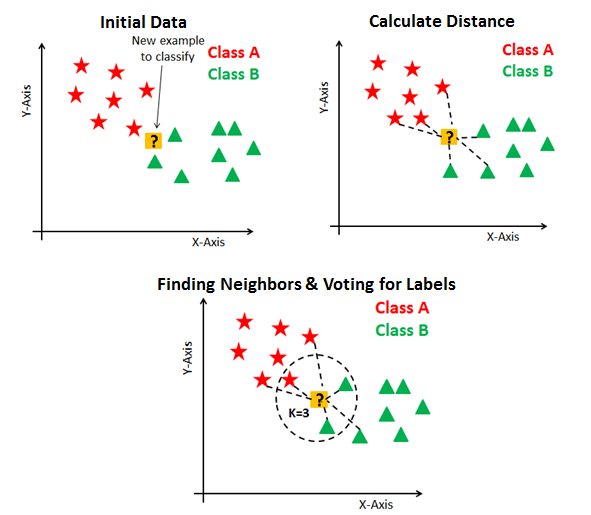

In [2]:
# Assigning features and label variables
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
#combinig weather and temp into single listof tuples
features=list(zip(weather_encoded,temp_encoded))
print(f'Weather feature encoded: {weather_encoded}\nTemperature feature encoded: {temp_encoded}\nLabel encoded: {label}\nFeatures zipped (as points): {features}')

Weather feature encoded: [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temperature feature encoded: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Label encoded: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
Features zipped (as points): [(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [3]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(features,label)

#Predict Output
x = 0 # 0:Overcast
y = 2 # 2:Mild
predicted= model.predict([[x ,y]]) # 0:Overcast, 2:Mild
print(f'Prediction for point ({x},{y}) = {predicted}')

Prediction for point (0,2) = [1]


### Powyżej zakodowaliśmy cechy na liczby naturalne, a następnie przenieśliśmy je na 2-wymiarową przestrzeń. Spoglądając na sąsiadów oceniliśmy jak sklasyfikować nasz punkt. W tym wypadku łagodna temperatura i pochmurne niebo okazało się dobrą okazją do wyjścia na zewnątrz i zabawy.

[]

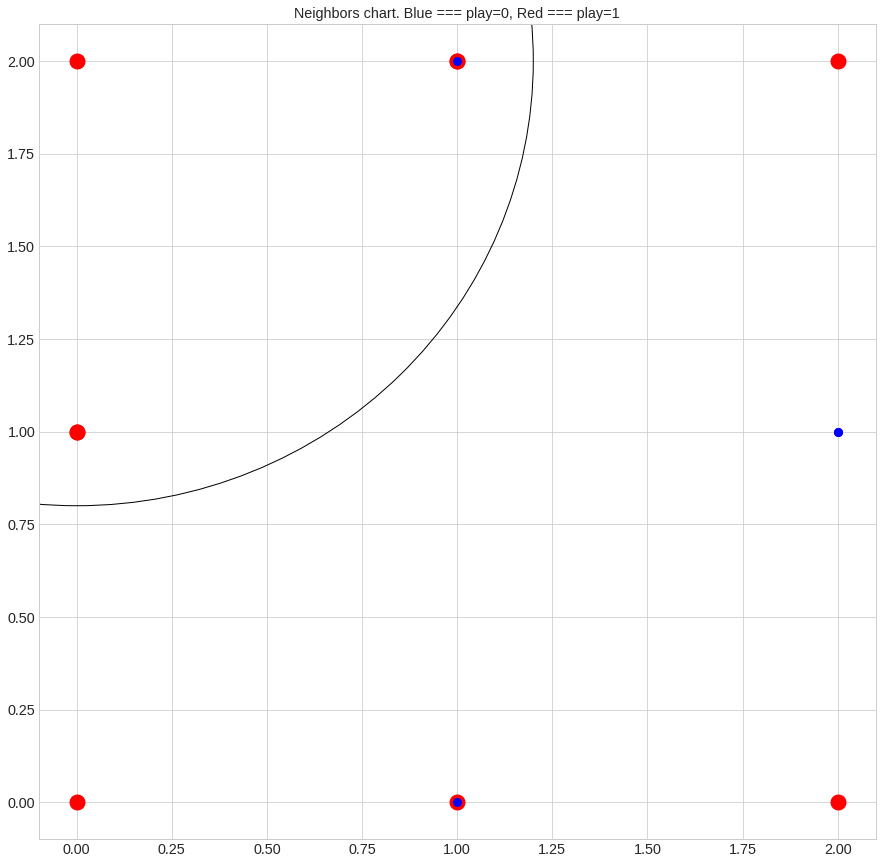

In [4]:
for i in range(0, len(label)):
    if label[i] == 1:
        plt.scatter(weather_encoded[i], temp_encoded[i], c='r', linewidth=10)
    else:
        plt.scatter(weather_encoded[i], temp_encoded[i], c='b', linewidth=3)

plt.title('Neighbors chart. Blue === play=0, Red === play=1')
circle = plt.Circle((0, 2), 1.2, fill=False)
plt.gcf().gca().add_artist(circle)
plt.plot()

### Na powyższym wykresie zaprezentowano obszar poszukiwań sąsiadów i na podstawie ich klasyfikacji, sklasyfikowano nasz punkt.

### k-NN with multiple labels

In [5]:
wine = datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
print(f'Classes = {wine.target_names}')
print(f'Targets = {wine.target}')
# df['class'] = wine.target

Classes = ['class_0' 'class_1' 'class_2']
Targets = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

neighbors = 3
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'Accuracy for {neighbors} neighbors: {metrics.accuracy_score(y_test, y_pred)}')

neighbors = 7
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'Accuracy for {neighbors} neighbors: {metrics.accuracy_score(y_test, y_pred)}')

neighbors = 9
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'Accuracy for {neighbors} neighbors: {metrics.accuracy_score(y_test, y_pred)}')

Accuracy for 3 neighbors: 0.7222222222222222
Accuracy for 7 neighbors: 0.7407407407407407
Accuracy for 9 neighbors: 0.6851851851851852


#### We can improve the classification by normalizing data to fit into range [0,1]

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
wine_minmax = min_max_scaler.fit_transform(wine.data)

X_train, X_test, y_train, y_test = train_test_split(wine_minmax, wine.target, test_size=0.3)

neighbors = 3
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'Accuracy for {neighbors} neighbors: {metrics.accuracy_score(y_test, y_pred)}')

neighbors = 7
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'Accuracy for {neighbors} neighbors: {metrics.accuracy_score(y_test, y_pred)}')

neighbors = 9
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'Accuracy for {neighbors} neighbors: {metrics.accuracy_score(y_test, y_pred)}')

Accuracy for 3 neighbors: 0.9259259259259259
Accuracy for 7 neighbors: 0.9629629629629629
Accuracy for 9 neighbors: 0.9629629629629629


#### Now let's classify wines using only 2 characteristics

Accuracy for 3 neighbors: 0.6851851851851852
Accuracy for 7 neighbors: 0.7592592592592593
Accuracy for 9 neighbors: 0.7777777777777778


[]

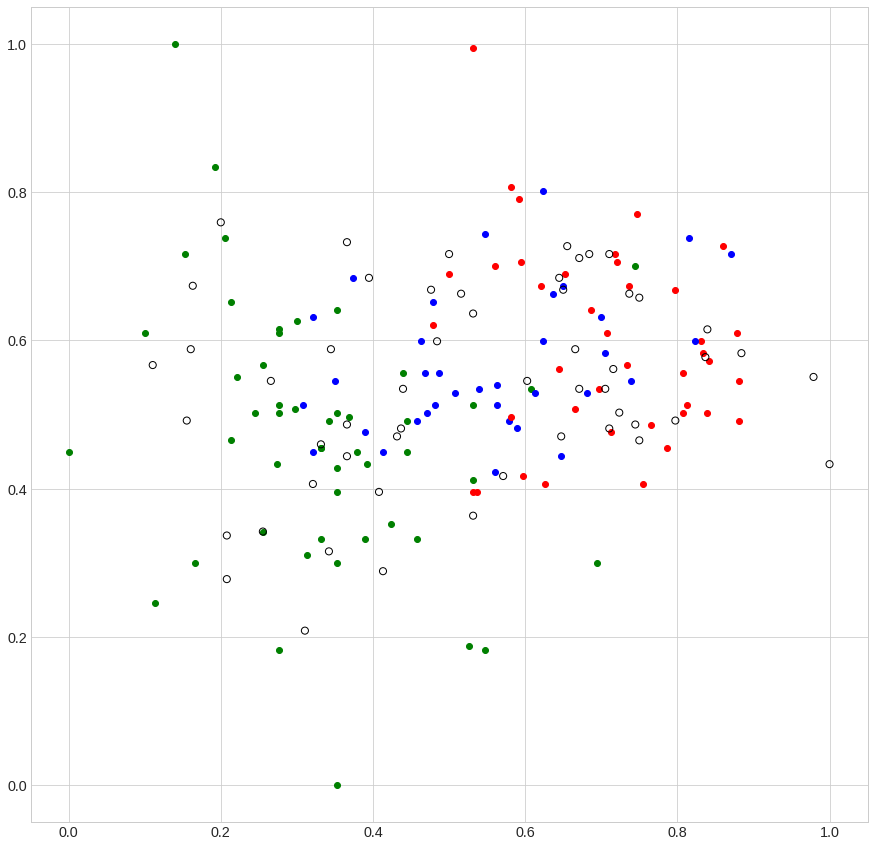

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
trim_df = df[['alcohol', 'ash']]
df_minmax = min_max_scaler.fit_transform(trim_df)

X_train, X_test, y_train, y_test = train_test_split(df_minmax, wine.target, test_size=0.3)

neighbors = 3
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'Accuracy for {neighbors} neighbors: {metrics.accuracy_score(y_test, y_pred)}')

neighbors = 7
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'Accuracy for {neighbors} neighbors: {metrics.accuracy_score(y_test, y_pred)}')

neighbors = 9
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'Accuracy for {neighbors} neighbors: {metrics.accuracy_score(y_test, y_pred)}')

# print(X_train)
# print(y_train)

for i in range(0, len(X_train)):
    if y_train[i] == 0:
        plt.scatter(X_train[i][0], X_train[i][1], c='r', linewidth=1)
    elif y_train[i] == 1:
        plt.scatter(X_train[i][0], X_train[i][1], c='g', linewidth=1)
    else:
        plt.scatter(X_train[i][0], X_train[i][1], c='b', linewidth=1)

for i in range(0, len(X_test)):
    plt.scatter(X_test[i][0], X_test[i][1],  s=50, facecolors='none', edgecolors='black')
    
plt.plot()

In [10]:
predicted= knn.predict([[0.35263158, 0.]])
print(predicted)

[1]


### Jak widać powyżej, skrajnie dolny punkt jest sklasyfikowany jako zielony, gdyż jego najbliżsi sąsiedzi są również zieloni

## 2. Decison tree

### Drzewo decyzyjne to nic innego jak graficzny sposób wspierania procesu decyzyjnego. Drzewo stosowane jest w teorii decyzji i ma sporo zastosowań. Może zarówno rozwiązać problem decyzyjny, jak i stworzyć plan. Metoda drzew decyzyjnych sprawdza się przede wszystkim, kiedy mamy problemy decyzyjne z wieloma rozgałęziającymi się wariantami oraz kiedy podejmujemy decyzję w warunkach ryzyka.

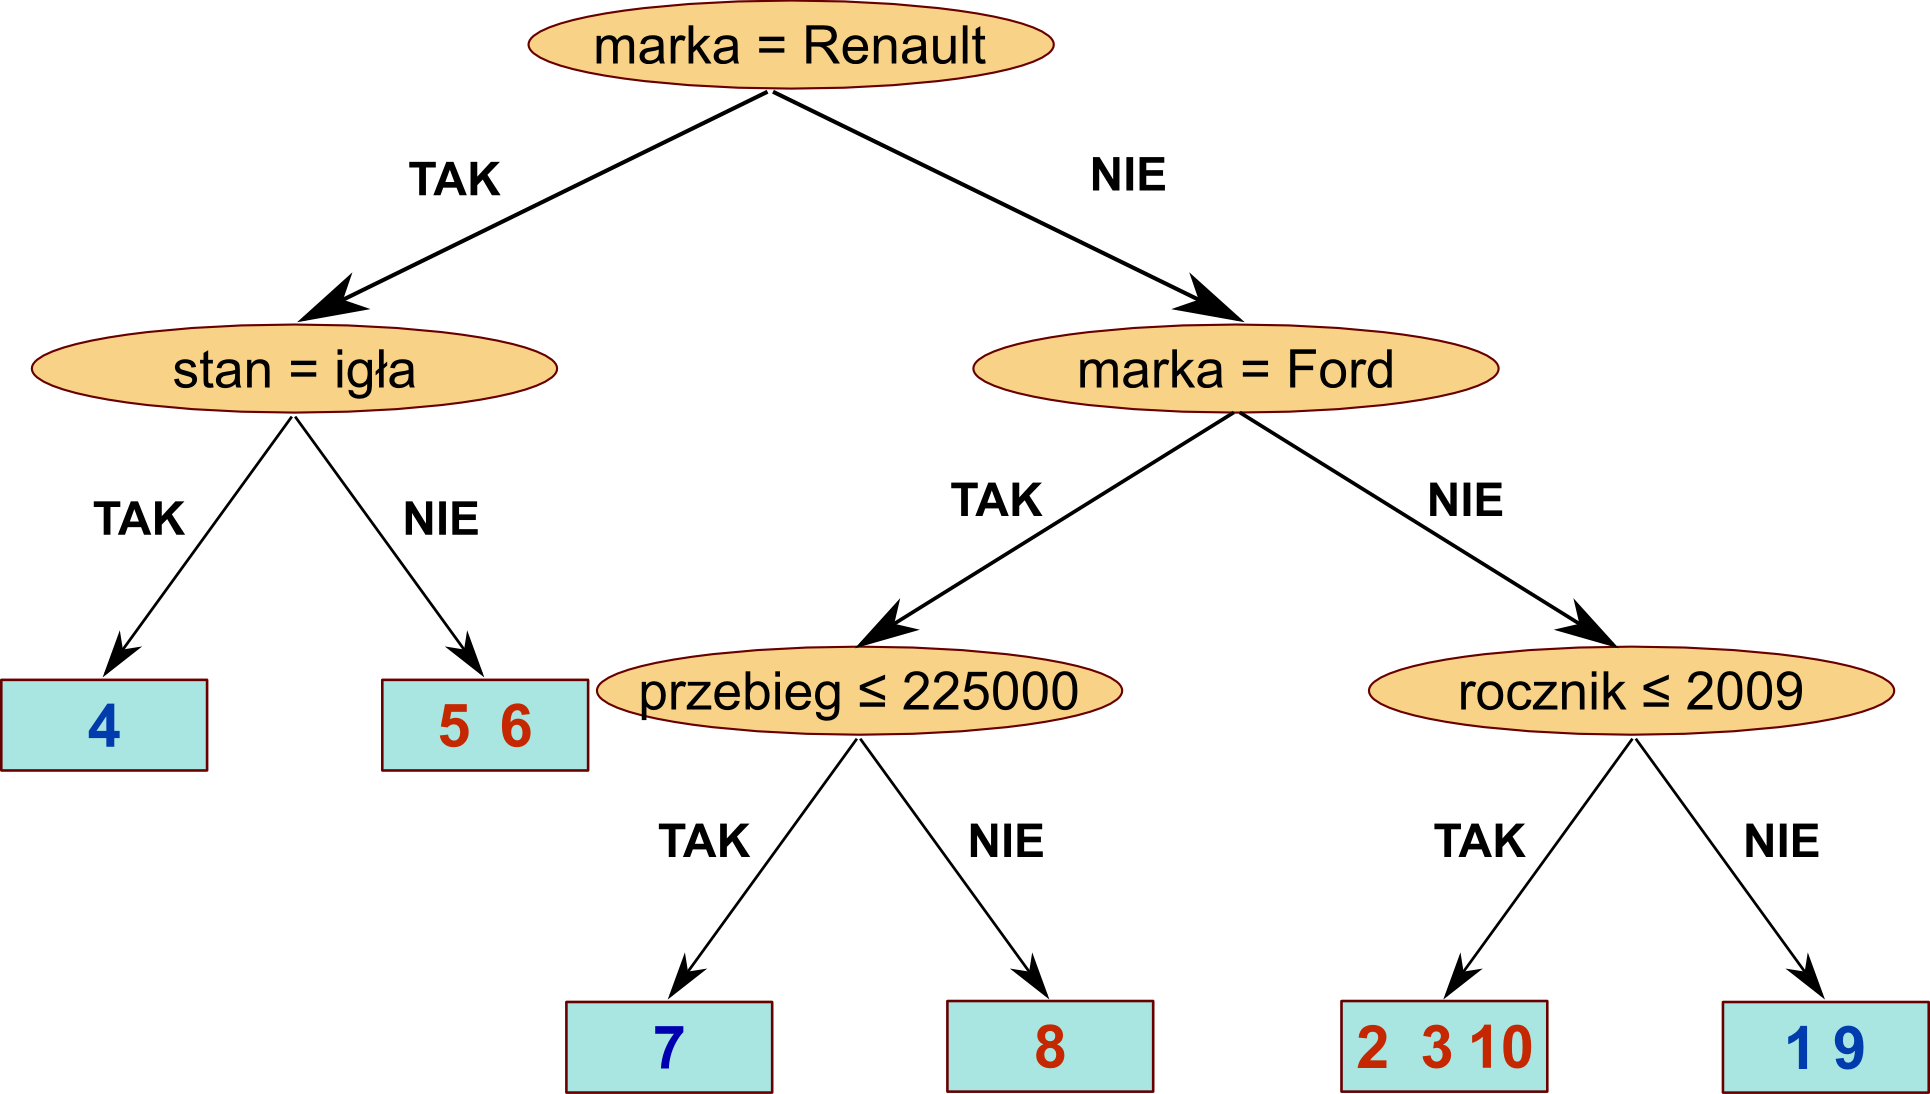

### Drzewo decyzyjne, dąży do wyboru takiego parametru podziału, oraz takich wartości podziału, aby w konsekwencji otrzymać 'najlepszy' podział. ’Najlepszy', mierzy się często za pomocą Gini Index lub Information Gain, opartym na entropii. Są to miary sprawdzające czystość podziału, czyli czy pozyskane poprzez podział liście drzewa, dają nam wartość. Następnie ponownie wybieramy parametr, oraz dokonujemy ponownego podziału, aby otrzymać jeszcze lepszy wynik. Drzewo decyzyjne, możemy budować do momentu, w którym w każdym liść będzie w 100% czysty, czyli będzie zawierać obserwacje tylko i wyłącznie jednakowej klasy. Wtedy jednak, drzewo będzie przeuczone (overfitted).

### W praktyce, budowę drzewa decyzyjnego, możemy zatrzymać w momencie kiedy: Zbiór osiągnął minimalną liczbę obserwacji, np w liściu znajduje się mniej niż 5% wszystkich obserwacji. Nie mamy parametru, za pomocą którego, dalszy podział dałby nam lepszy wynik. Zbiór jest 'czysty', czyli zawiera obserwacje tylko jednego typu.

In [11]:
# !pip3 install graphviz
# !pip3 install pydotplus
# !sudo apt-get install graphviz

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus

In [13]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6883116883116883


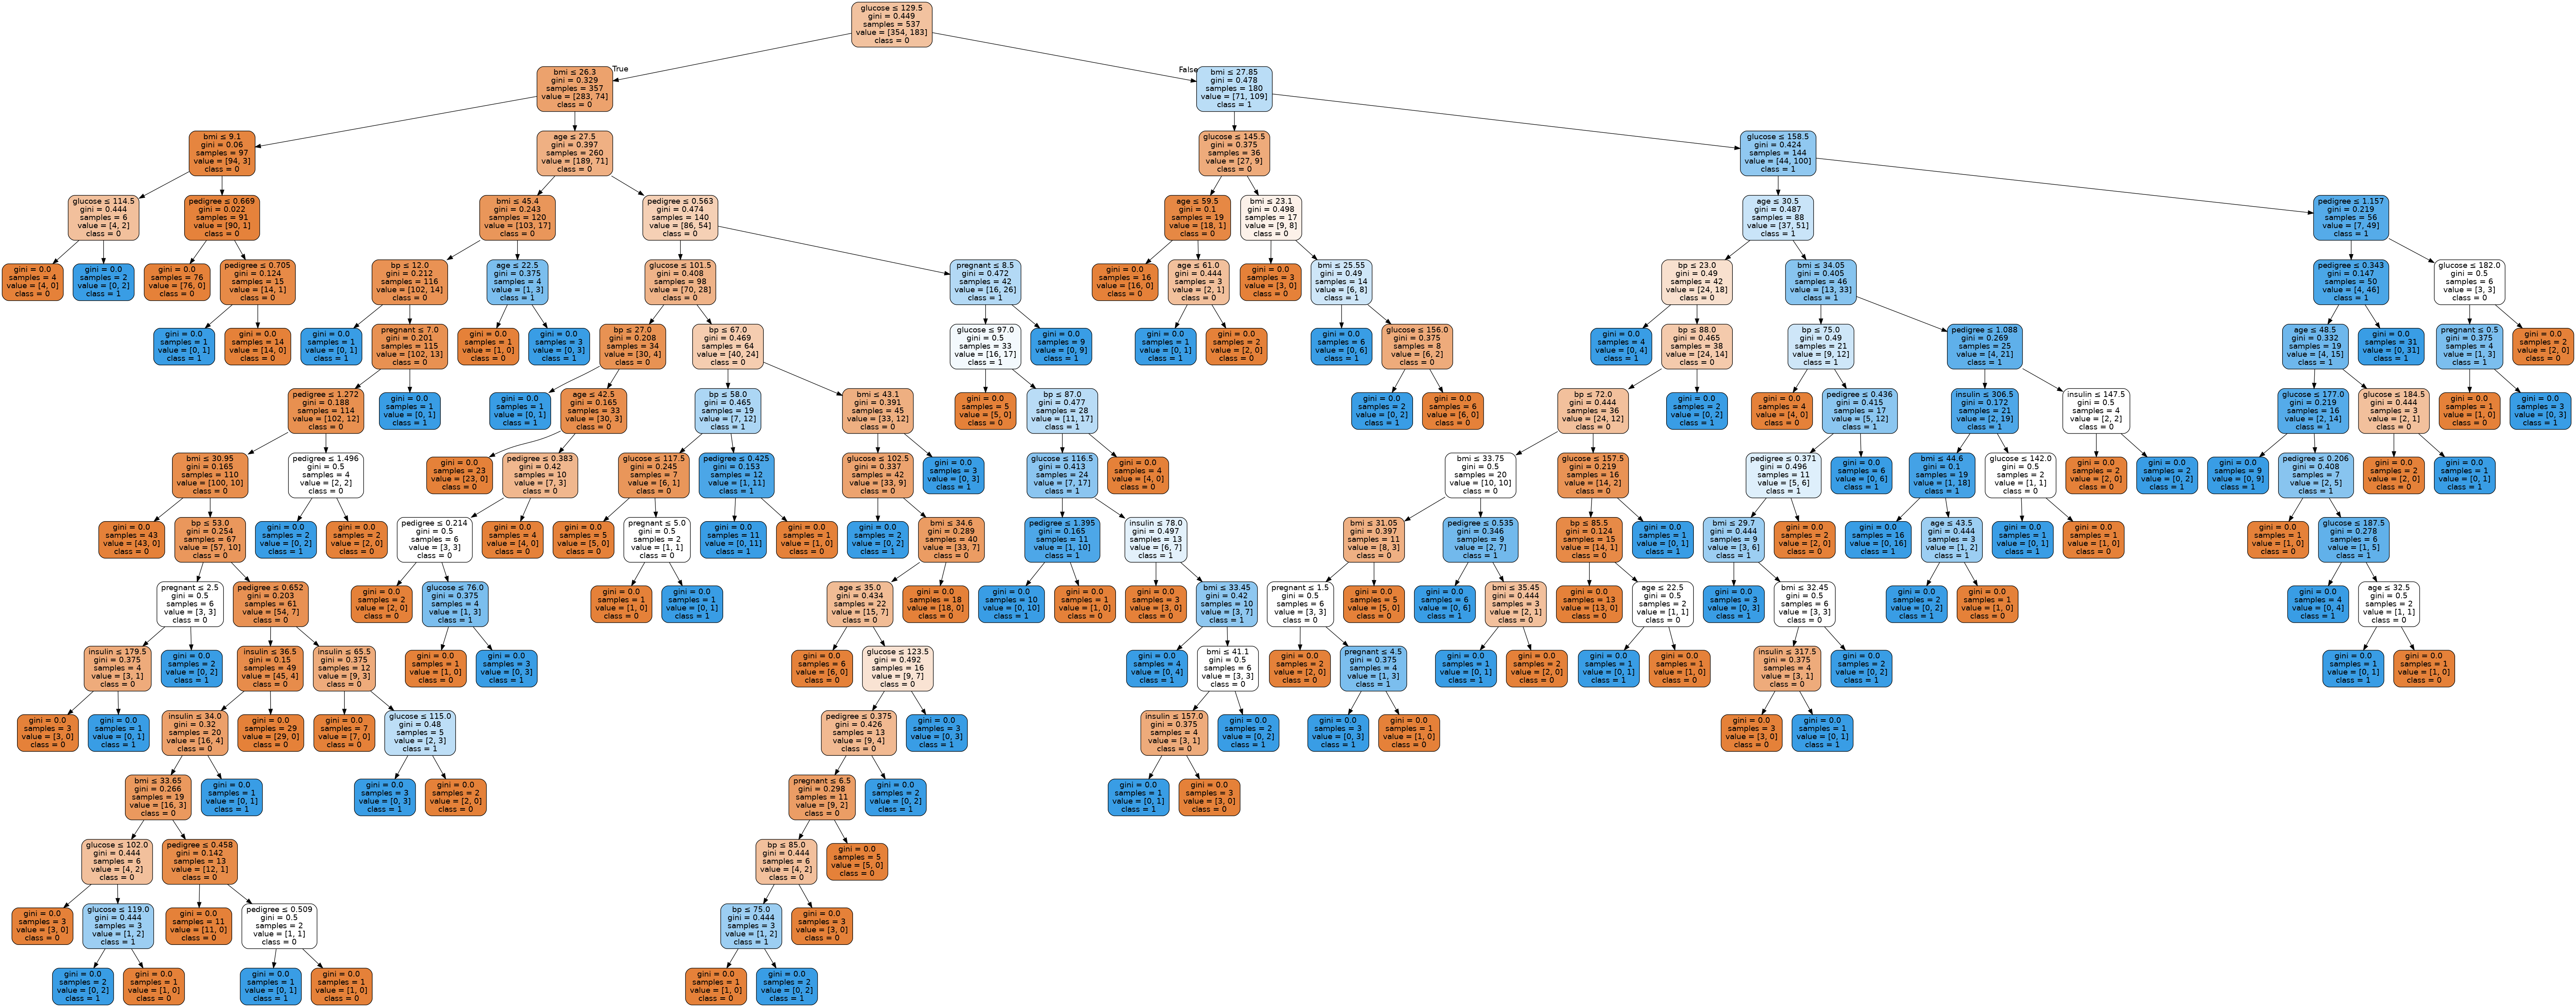

In [16]:
out_file = export_graphviz(clf,filled=True,
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1']
               )
graph = pydotplus.graph_from_dot_data(out_file)
Image(graph.create_png())

In [17]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


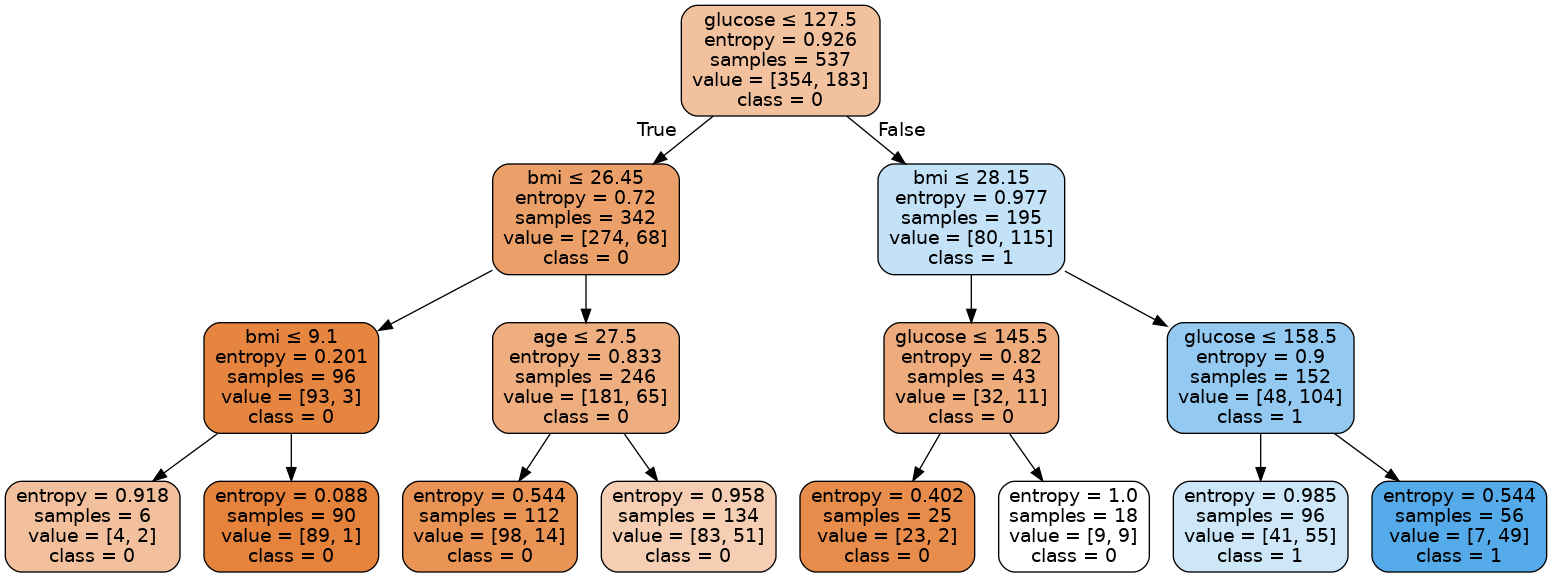

In [18]:
out_file = export_graphviz(clf,filled=True,
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1']
               )
graph = pydotplus.graph_from_dot_data(out_file)
Image(graph.create_png())

## 3. Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

### Regresja logistyczna jest przydatna w sytuacjach, w których wymagane jest przewidywanie obecności lub braku cechy bądź wyniku na podstawie wartości zestawu predyktorów. Jest podobna do modelu regresji liniowej, ale nadaje się dla modeli, w których zmienna zależna jest dychotomiczna. Współczynniki regresji logistycznej mogą być używane do oszacowania ilorazów szans dla każdej zmiennej niezależnej w modelu.

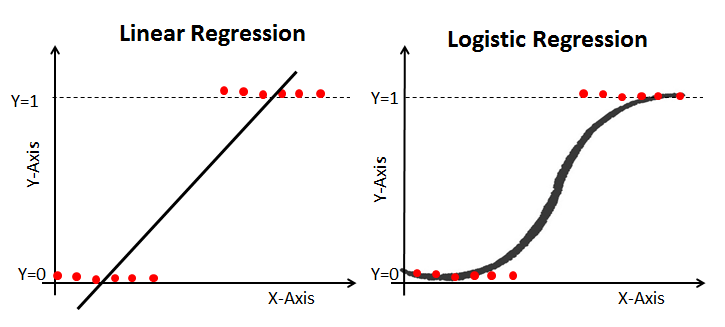

In [20]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

/home/max/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
list_of_tuples = list(zip(y_test, y_pred)) 

results_df = pd.DataFrame(list_of_tuples,
                  columns = ['Actual', 'Predicted']) 
results_df

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
187,1,0
188,1,0
189,0,0
190,0,0


In [24]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]])

Text(0.5, 954.4, 'Predicted')

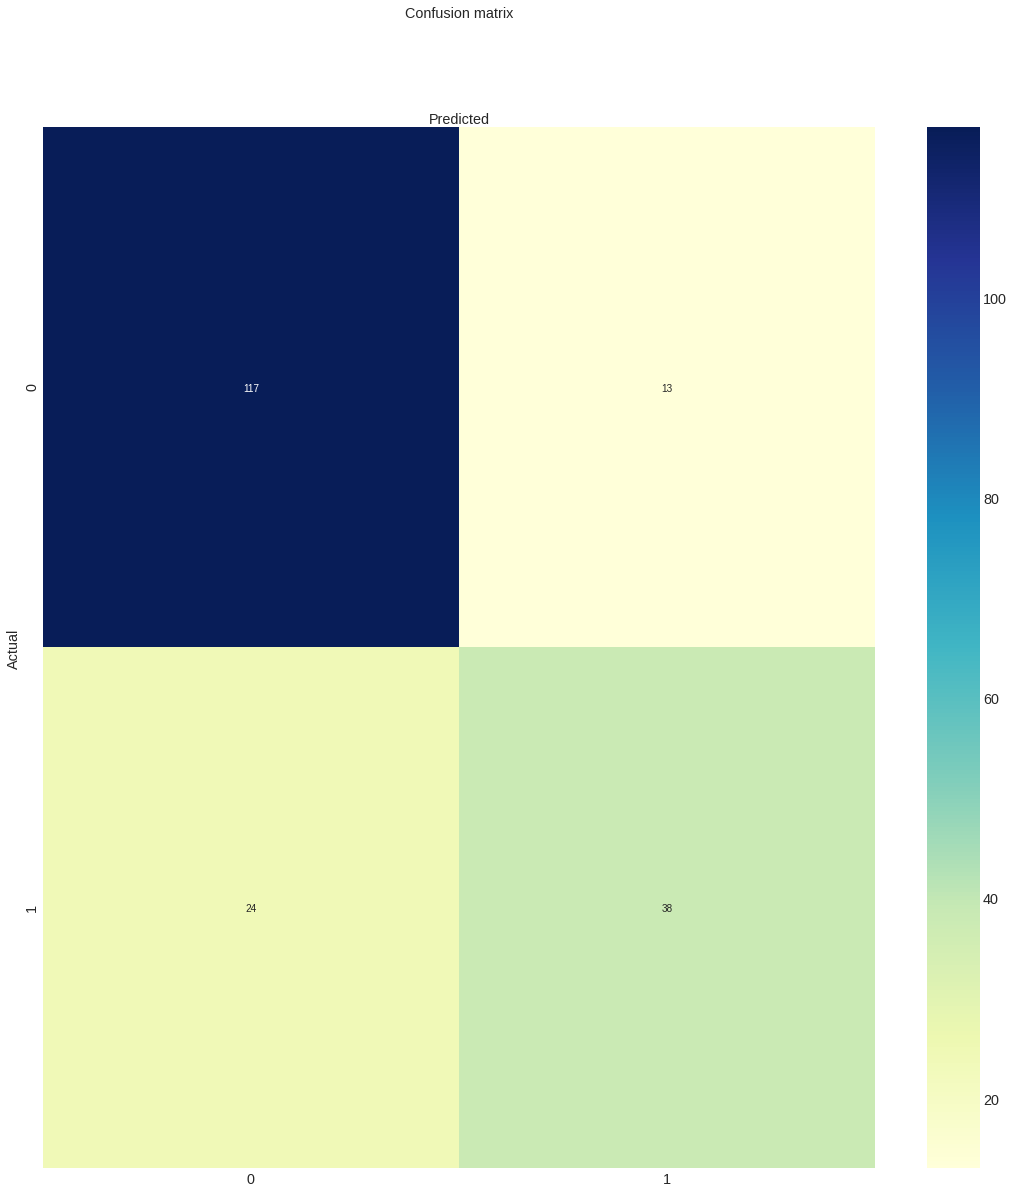

In [25]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7450980392156863
Recall: 0.6129032258064516


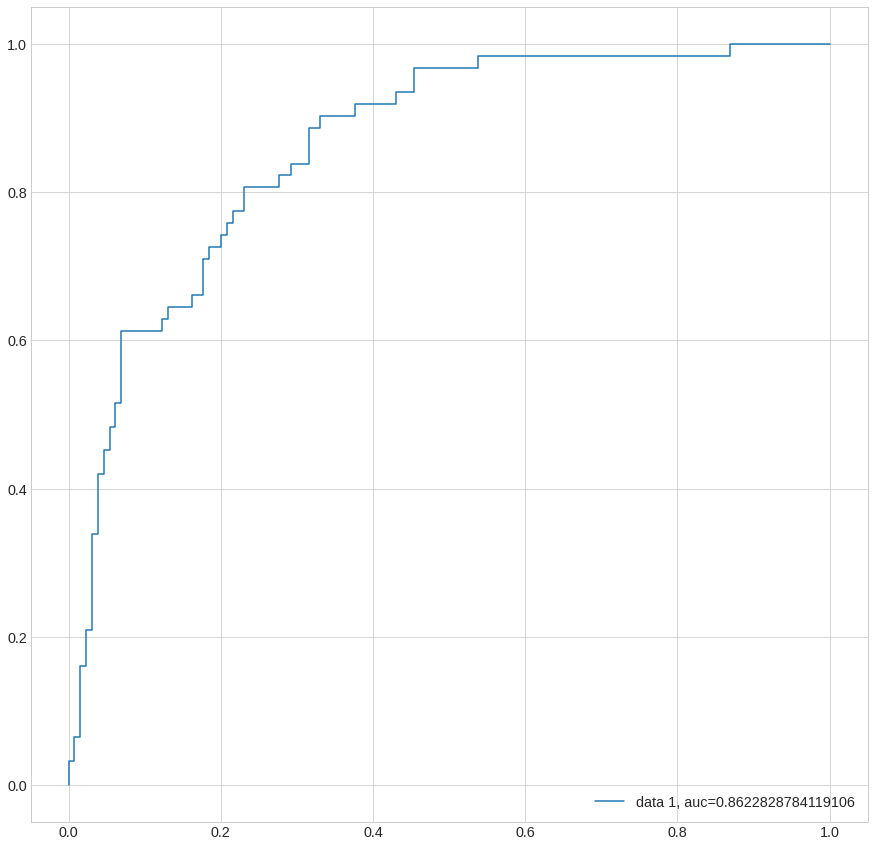

In [27]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## 4. Naive Bayes

### Naiwny klasyfikator Bayesowski, bazujący na twierdzeniu Bayesa, nadaje się szczególnie do problemów o bardzo wielu wymiarach na wejściu. Mimo prostoty metody, często działa ona lepiej od innych, bardzo skomplikowanych metod klasyfikujących.

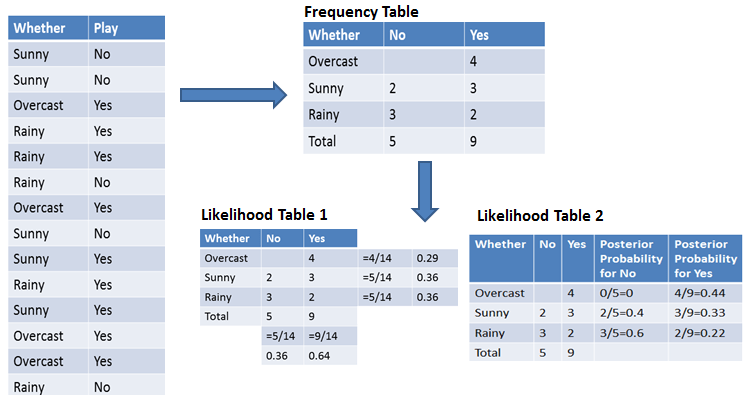

In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


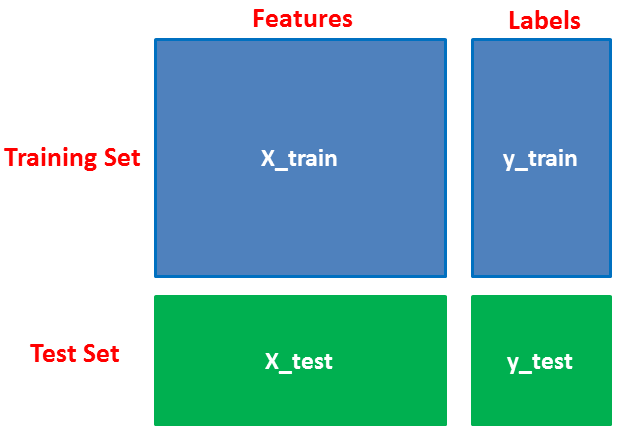

In [30]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

In [31]:
list_of_tuples = list(zip(y_test, y_pred)) 

results_df = pd.DataFrame(list_of_tuples,
                  columns = ['Actual', 'Predicted']) 
results_df

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
187,1,0
188,1,0
189,0,0
190,0,0


In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7760416666666666


## 5. LDA (Linear Discriminant Analysis)

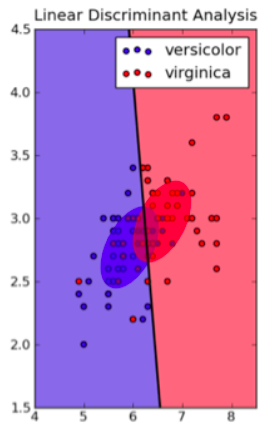

### Analiza funkcji dyskryminacyjnej jest stosowana do rozstrzygania, które zmienne pozwalają w najlepszy sposób dzielić dany zbiór przypadków na występujące w naturalny sposób grupy. Na przykład, w badaniach pedagogicznych można dociekać, które zmienne pozwalają oddzielić absolwentów szkół średnich, którzy decydują się (1) iść na studia, (2) uczęszczać do pomaturalnych szkół zawodowych lub (3) zaprzestać dalszej nauki. W tym celu badacz mógł zebrać dane dotyczące wielu zmiennych poprzedzających ukończenie szkoły. Po ukończeniu szkoły większość absolwentów w naturalny sposób zostanie zaliczona do jednej z trzech wymienionych kategorii. Analiza dyskryminacyjna mogłaby następnie być wykorzystana do rozstrzygnięcia, która zmienna lub zmienne są najlepszymi predyktorami późniejszego wyboru absolwentów.

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [34]:
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

lda = LinearDiscriminantAnalysis()
y_pred = lda.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 3


In [35]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.94      0.97      0.95        30
           2       0.96      0.92      0.94        24

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [36]:
list_of_tuples = list(zip(y_test, y_pred)) 

results_df = pd.DataFrame(list_of_tuples,
                  columns = ['Actual', 'Predicted']) 
results_df

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
...,...,...
70,2,2
71,1,1
72,0,0
73,0,0


## 6. SVM (Support Vector Machine)

### Maszyna wektorów nośnych (ang. Support Vector Machine, SVM) – abstrakcyjny koncept maszyny, która działa jak klasyfikator, a której nauka ma na celu wyznaczenie hiperpłaszczyzny rozdzielającej z maksymalnym marginesem przykłady należące do dwóch klas. Często wykorzystywana niejawnie w procesie rozpoznawania obrazów.

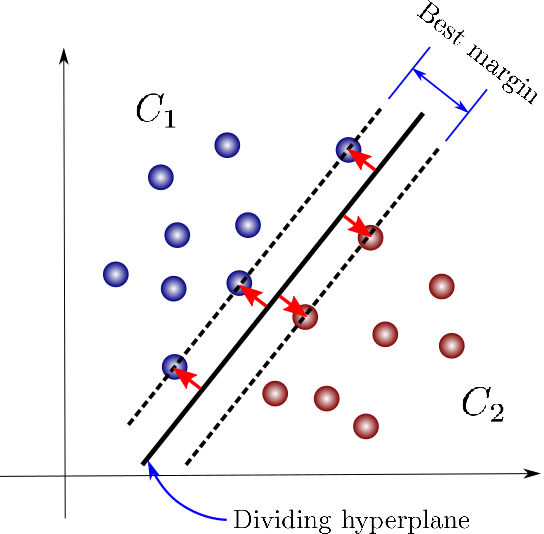

In [37]:
from sklearn import svm

In [38]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8020833333333334
Precision: 0.74
Recall: 0.5967741935483871


In [40]:
list_of_tuples = list(zip(y_test, y_pred)) 

results_df = pd.DataFrame(list_of_tuples,
                  columns = ['Actual', 'Predicted']) 
results_df

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
187,1,0
188,1,0
189,0,0
190,0,0


## 7. MLP (Multi Layer Perceptron)

### Perceptron wielowarstwowy (ang. Multilayer Perceptron, MLP) – najpopularniejszy typ sztucznych sieci neuronowych. Sieć tego typu składa się zwykle z jednej warstwy wejściowej, kilku warstw ukrytych oraz jednej warstwy wyjściowej.

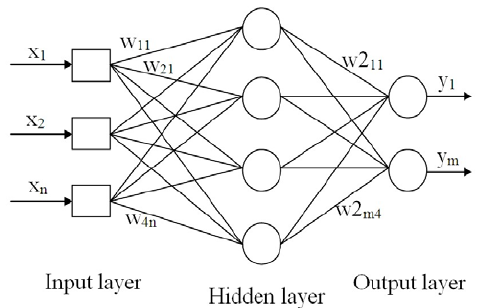

In [41]:
from sklearn.neural_network import MLPClassifier

In [42]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

mlp = MLPClassifier(random_state=1, max_iter=1500).fit(X_train, y_train)
y_pred = mlp.predict_proba(X_test)
y_pred2 = mlp.predict(X_test)

mlp.score(X_test, y_test)

0.7395833333333334

In [43]:
list_of_tuples = list(zip(y_test, y_pred)) 

results_df = pd.DataFrame(list_of_tuples,
                  columns = ['Actual', 'Predicted']) 
results_df

,Actual,Predicted
0,1,"[0.062632540342893, 0.937367459657107]"
1,0,"[0.8777644666886439, 0.12223553331135605]"
2,0,"[0.7945138058744821, 0.205486194125518]"
3,1,"[0.21592953571344253, 0.7840704642865575]"
4,0,"[0.7038721459935164, 0.2961278540064836]"
...,...,...
187,1,"[0.6143356618848157, 0.3856643381151843]"
188,1,"[0.47684003714574863, 0.5231599628542514]"
189,0,"[0.8449259008574406, 0.15507409914255949]"
190,0,"[0.6898018601431557, 0.3101981398568443]"
